<a href="https://colab.research.google.com/github/hanamallek-glitch/FullPack-IA/blob/main/TestIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **QCM FULLPACK IA — 20 questions**
📊 **1–4 : Data Analysis**
1. Que renvoie la méthode .groupby() dans pandas ?

    C. Un objet regroupé par clé
2. Quelle méthode calcule la médiane d’une colonne ?

    B. .median()
3. Quel type de graphique est idéal pour analyser une distribution ?

    B. Boxplot
4. Quel code remplace les NaN dans une colonne par 0 ?

    A. df.fillna(0)
🤖 **5–8 : Machine Learning**

5. Quel algorithme est non-linéaire ?

    C. Decision Tree
6. Pourquoi utilise-t-on un split train/test ?

    B. Pour évaluer la généralisation du modèle
7. Quelle métrique est la plus adaptée si les classes sont déséquilibrées ?

    D. F1-score
8. Que fait le paramètre max_depth dans un arbre ?

    B. Limite la profondeur de l’arbre

🖼️ 9–12 : Computer Vision
9. Quelle est la taille des images dans le dataset MNIST ?

    C. 28x28

10. Quelle bibliothèque est utilisée pour charger des images en OpenCV ?

    B. cv2

11. Que fait une convolution dans un CNN ?

    C. Elle extrait des motifs

12. Quelle couche suit généralement une couche convolution ?
   D. MaxPooling

🧠 13–16 : Deep Learning / NLP

13. Que retourne une couche Embedding ?

    C. Un vecteur dense
14. Quelle est la fonction d’activation la plus utilisée en NLP ?

    C. Softmax
15. Que permet le padding dans les séquences NLP ?

    C. Uniformiser la longueur des phrases
16. Quelle fonction compile un modèle Keras ?

    B. model.compile()
📚 17–20 : LLM / Transformers

17. Que veut dire “LLM” ?

    C. Large Language Model
18. Quel est le rôle du tokenizer ?

    C. Convertir du texte en tokens
19. Quel modèle est auto-régressif ?

    C. GPT
20. Quelle bibliothèque gère les LLMs open source ?

    C. transformers



### **Projet 1 — Prédiction de la fraude bancaire avec XGBoost**

Objectif : Détecter les transactions frauduleuses sur carte bancaire
Techniques : XGBoost, SMOTE, GridSearch, AUC-ROC

•	📦 Dataset :
Credit Card Fraud Detection

•	🔧 Tâches :

•	Analyse EDA

•	SMOTE pour équilibrer

•	XGBoost tuning

•	Explication des variables importantes

•	Visualisation ROC + confusion matrix


La Dataset: Credit Card Fraud Detection

Ce jeu de données provient de transactions réelles effectuées par des titulaires de cartes bancaires européens, pendant le mois de septembre 2013.
Il s’agit de transactions anonymisées collectées sur 2 jours seulement.

**Période couverte** : 2 jours.

**Nombre total de transactions** : 284 807.

**Nombre de fraudes** : 492.

Cela veut dire que seulement 0,172 % (moins de 2 transactions sur 1000) sont frauduleuses.

👉 C’est un jeu de données extrêmement **déséquilibré** (highly unbalanced), ce qui rend la détection difficile.

**Classe positive** (fraude) = 1 → très rare.

**Classe négative** (non fraude) = 0 → très fréquente.

les variables d’origine qui sont sensibles (par ex. lieu, heure, type de commerce, etc.) ont été transformées et anonymisées en des valeurs numériques à travers PCA devenu (V1, V2, ... V28) à l'exception Time, amount, Class.

XGBoost (Extreme Gradient Boosting) est un algorithme d’apprentissage supervisé très performant basé sur le principe du boosting de gradient.

Il combine plusieurs arbres de décision faibles pour créer un modèle très puissant.

Il est particulièrement efficace pour les données tabulaires (comme les données de crédit bancaire).

**EDA** signifie **Exploratory Data Analysis**

C’est la première étape essentielle dans tout projet de Data Science ou Machine Learning avant d’entraîner un modèle.

Comprendre en profondeur mon jeu de données avant d’appliquer des modèles.

Structure du dataset, Statistiques descriptives, Valeurs manquantes / doublons, Distribution des variables, ...

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df=pd.read_csv('/content/drive/MyDrive/Formation IA/TestFinal/creditcard.csv')

In [5]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [6]:
print(df.shape)

(284807, 31)


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
print(df.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [9]:
#combien de fois chaque valeur de Class apparaît.
print(df["Class"].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


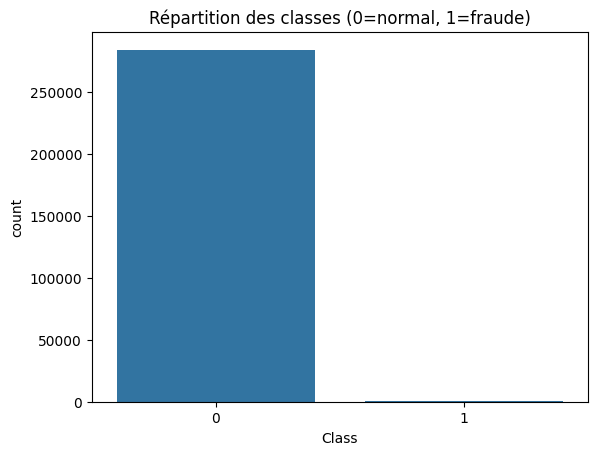

In [10]:
#la bibliothèque Seaborn pour afficher un graphique à barres (count plot) des classes.

#Sur l’axe X, on a les deux classes : 0 et 1

#Sur l’axe Y, le nombre d’occurrences de chaque classe
import seaborn as sns
sns.countplot(x="Class", data=df)
plt.title("Répartition des classes (0=normal, 1=fraude)")
plt.show()

Il y a alors un déséquilibre entre les classes

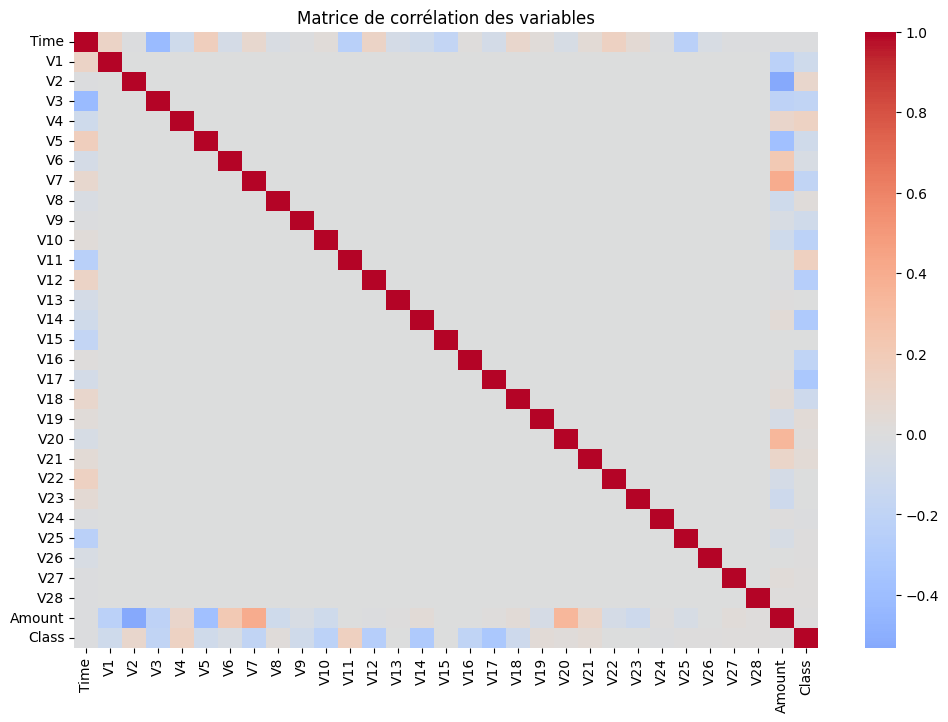

In [11]:
# Corrélation (juste pour aperçu)
corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Matrice de corrélation des variables")
plt.show()

Les corrélations avec Class (dernière ligne / dernière colonne) sont faibles, souvent entre -0.1 et +0.3.

Mais quelques composantes comme V10, V14, V17 peuvent montrer des valeurs un peu plus fortes (en bleu clair ou rouge clair) :
👉 Ces variables sont plus liées à la fraude et pourraient être importantes pour le modèle.

SMOTE signifie Synthetic Minority Oversampling Technique

Il sert à équilibrer les classes d’un dataset déséquilibré

SMOTE crée artificiellement de nouvelles observations pour la classe minoritaire (fraudes), au lieu de simplement les dupliquer.

Étapes :

Pour chaque transaction frauduleuse, SMOTE choisit k voisins proches (par défaut k=5).

Il interpole entre ces points pour créer de nouvelles fraudes synthétiques (entre 0 et 1).

Le dataset final contient un nombre équilibré d’exemples dans les deux classes.

Ainsi, le modèle apprend mieux à distinguer les cas de fraude.

Alors SMOTE ajoute de nouveaux fraudes pour que le modèle voie les deux classes de manière équilibrée.

SMOTE ne copie pas les fraudes existantes,
il crée de nouvelles transactions artificielles similaires, en combinant les valeurs des vraies fraudes.

Ainsi :

Le modèle ne “triche” pas en apprenant par cœur les mêmes exemples.

Il apprend des zones de décision plus larges, donc il généralise mieux.

In [12]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter

In [13]:
# Séparer X et y
X = df.drop(columns=["Class"])
y = df["Class"]

In [14]:
# Séparer train / test avant d'appliquer SMOTE
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [15]:
# Afficher déséquilibre avant SMOTE
print("Avant SMOTE :", Counter(y_train))

Avant SMOTE : Counter({0: 227451, 1: 394})


In [16]:
# Appliquer SMOTE uniquement sur le train
sm = SMOTE(random_state=42, k_neighbors=5)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [17]:
# Vérifier nouvel équilibre
print("Après SMOTE :", Counter(y_train_res))

Après SMOTE : Counter({0: 227451, 1: 227451})


XGBoost apprend à partir de plusieurs petits arbres de décision, qu’il combine pour faire une prédiction finale très précise.

“Tuning” veut dire “ajuster les réglages” du modèle pour qu’il soit le plus performant possible.
il faut les “tuner” (ajuster)

Car si on laisse les valeurs par défaut, le modèle peut :

mal apprendre (trop simple),

ou trop apprendre (mémoriser au lieu de généraliser).

Le tuning aide à trouver le bon équilibre.

Comment on fait le tuning

On utilise une méthode appelée GridSearchCV (Recherche par grille croisée).

➡️ Elle essaie automatiquement plusieurs combinaisons de paramètres et choisit la meilleure selon un critère (ici l’AUC-ROC).

In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from xgboost import XGBClassifier
# 2) Pipeline simple : SMOTE -> XGBoost
pipe = ImbPipeline(steps=[
    ("smote", SMOTE(random_state=42, k_neighbors=5)),
    ("model", XGBClassifier(
        objective="binary:logistic",
        eval_metric="auc",
        tree_method="hist",   # rapide CPU (si GPU: 'gpu_hist')
        n_jobs=-1,
        random_state=42
    ))
])

# 3) Grille légère pour le tuning
param_grid = {
    "model__n_estimators": [300, 600],
    "model__max_depth": [3, 5],
    "model__learning_rate": [0.05, 0.1],
    "model__subsample": [0.8, 1.0],
    "model__colsample_bytree": [0.8, 1.0],

}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring="roc_auc",   # adapté aux classes rares
    cv=cv,
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)

print("Meilleurs hyperparamètres :", grid.best_params_)
print("Meilleur AUC-ROC (CV)    :", grid.best_score_)

# 4) Évaluation test
best_model = grid.best_estimator_
y_proba = best_model.predict_proba(X_test)[:, 1]
print("AUC-ROC (test) :", roc_auc_score(y_test, y_proba))

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Meilleurs hyperparamètres : {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 600, 'model__subsample': 0.8}
Meilleur AUC-ROC (CV)    : 0.9800811870081676
AUC-ROC (test) : 0.9837458583602264


**model__n_estimators **= 600

→ nombre total d’arbres dans le modèle.

Chaque arbre corrige les erreurs du précédent.

Plus d’arbres = modèle plus puissant, mais risque de surapprentissage (overfitting) si trop élevé.

Ici, 600 indique un bon équilibre : le modèle a appris assez de motifs sans se suradapter.

🔹 Rôle : nombre de “boosting rounds”.

** model__max_depth** = 5

→ profondeur maximale de chaque arbre.

C’est le nombre de niveaux de décision (ou de conditions) que l’arbre peut construire.

Plus max_depth est grand, plus le modèle peut capturer des relations complexes,
mais trop profond = risque de mémoriser les données d’entraînement.

🔹 Ici : 5 → modèle capable de décisions complexes mais encore général.

**model__learning_rate** = 0.1

→ taux d’apprentissage (η ou eta).

Contrôle la vitesse à laquelle XGBoost apprend.

Chaque arbre contribue pour une fraction (ici 10%) à la prédiction finale.

Si trop grand → le modèle apprend trop vite et se trompe.

Si trop petit → il apprend lentement mais de façon plus stable.

🔹 0.1 est une valeur standard et efficace.

**model__subsample** = 0.8

→ fraction d’échantillons (lignes) utilisée pour chaque arbre.

XGBoost ne prend pas 100 % des données à chaque itération,
mais seulement 80 % (0.8) de manière aléatoire.

Cela introduit de la diversité et évite l’overfitting (principe proche du Random Forest).

🔹 Effet : améliore la généralisation, surtout quand le dataset est grand.

**model__colsample_bytree** = 0.8

→ fraction de variables (colonnes/features) utilisée par arbre.

Comme subsample mais pour les colonnes.

Chaque arbre voit un sous-ensemble aléatoire des variables,
ce qui réduit la dépendance entre les arbres et améliore la robustesse.

🔹 0.8 signifie que chaque arbre utilise 80 % des variables.

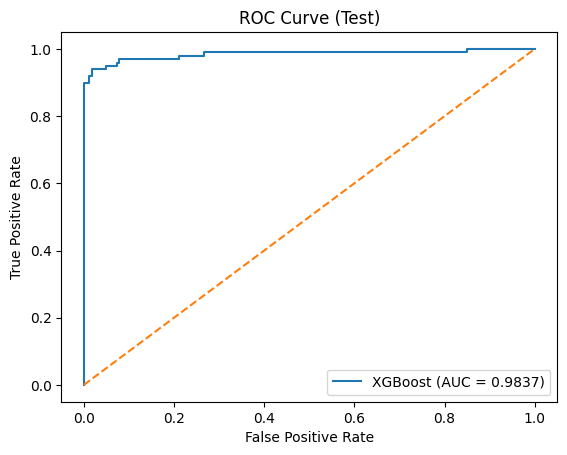

AUC-ROC (test) : 0.9837
Seuil optimal (Youden J) ≈ 0.000

=== Seuil par défaut (seuil=0.500) ===
[[56843    21]
 [   15    83]]
              precision    recall  f1-score   support

           0     0.9997    0.9996    0.9997     56864
           1     0.7981    0.8469    0.8218        98

    accuracy                         0.9994     56962
   macro avg     0.8989    0.9233    0.9107     56962
weighted avg     0.9994    0.9994    0.9994     56962



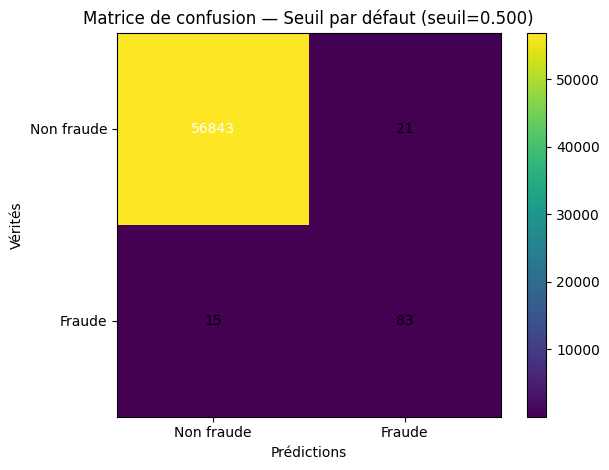


=== Seuil optimal (Youden) (seuil=0.000) ===
[[55800  1064]
 [    6    92]]
              precision    recall  f1-score   support

           0     0.9999    0.9813    0.9905     56864
           1     0.0796    0.9388    0.1467        98

    accuracy                         0.9812     56962
   macro avg     0.5397    0.9600    0.5686     56962
weighted avg     0.9983    0.9812    0.9891     56962



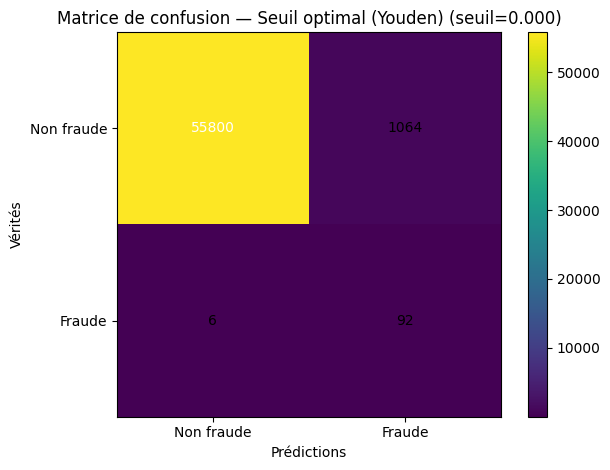

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    roc_auc_score, roc_curve, confusion_matrix, classification_report
)

# ===== 1) Probabilités, AUC et courbe ROC =====
y_proba = best_model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_proba)
fpr, tpr, thr = roc_curve(y_test, y_proba)

plt.figure()
plt.plot(fpr, tpr, label=f"XGBoost (AUC = {auc:.4f})")
plt.plot([0,1],[0,1],"--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Test)")
plt.legend(loc="lower right")
plt.show()

print(f"AUC-ROC (test) : {auc:.4f}")

# ===== 2) Seuil optimal (Youden J) =====
j_scores = tpr - fpr
best_idx = np.argmax(j_scores)
best_thr = thr[best_idx]
print(f"Seuil optimal (Youden J) ≈ {best_thr:.3f}")

# ===== 3) Matrices de confusion (seuil 0.5 et seuil optimal) =====
def show_confusion(threshold, title):
    y_pred = (y_proba >= threshold).astype(int)
    cm = confusion_matrix(y_test, y_pred)
    print(f"\n=== {title} (seuil={threshold:.3f}) ===")
    print(cm)
    print(classification_report(y_test, y_pred, digits=4))

    plt.figure()
    plt.imshow(cm, interpolation="nearest")
    plt.title(f"Matrice de confusion — {title} (seuil={threshold:.3f})")
    plt.colorbar()
    plt.xticks([0,1], ["Non fraude","Fraude"])
    plt.yticks([0,1], ["Non fraude","Fraude"])
    for i in range(2):
        for j in range(2):
            plt.text(j, i, cm[i, j], ha="center", va="center",
                     color="white" if cm[i, j] > cm.max()/2 else "black")
    plt.xlabel("Prédictions"); plt.ylabel("Vérités")
    plt.tight_layout(); plt.show()

show_confusion(0.5, "Seuil par défaut")
show_confusion(best_thr, "Seuil optimal (Youden)")


✅ Projet 2 — Analyse de sentiments sur des avis de films
Objectif : Classer automatiquement les critiques de films (positif/négatif)

Techniques : LSTM, GRU, Word Embedding, Attention

•	📦 Dataset :
IMDB Movie Review Dataset
•	🔧 Tâches :

•	Tokenisation, padding
•	Embedding layer
•	Modèle LSTM ou GRU
•	Visualisation des résultats
•	Comparaison avec baseline


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
import numpy as np

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
csv_path = '/content/drive/MyDrive/Formation IA/TestFinal/IMDB Dataset.csv'
df = pd.read_csv(csv_path, encoding='utf-8', engine='python')
print("Colonnes:", list(df.columns))
df.head()

Colonnes: ['review', 'sentiment']


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [31]:
# Convertir les labels texte en nombres (1 = positif, 0 = négatif)
df["sentiment"] = df["sentiment"].str.lower().map({"positive": 1, "negative": 0})
print(df["sentiment"].value_counts())
df.head()


sentiment
1    25000
0    25000
Name: count, dtype: int64


,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [32]:
#Division en train/test
from sklearn.model_selection import train_test_split

texts = df["review"].tolist()
labels = df["sentiment"].tolist()

X_train_texts, X_test_texts, y_train, y_test = train_test_split(
    texts, labels, test_size=0.2, random_state=42, stratify=labels
)

print(f"Train : {len(X_train_texts)} exemples, Test : {len(X_test_texts)} exemples")


Train : 40000 exemples, Test : 10000 exemples


In [33]:
#Tokenisation
from tensorflow.keras.preprocessing.text import Tokenizer

vocab_size = 30000   # nombre max de mots gardés
oov_token  = "<OOV>" # token pour mots inconnus

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(X_train_texts)

print("Taille du vocabulaire :", len(tokenizer.word_index))


Taille du vocabulaire : 111959


In [34]:
#Transformation en séquences
X_train_seq = tokenizer.texts_to_sequences(X_train_texts)
X_test_seq  = tokenizer.texts_to_sequences(X_test_texts)

print("Exemple de séquence :")
print(X_train_texts[0][:100], "→", X_train_seq[0][:15])


Exemple de séquence :
I caught this little gem totally by accident back in 1980 or '81. I was at a revival theatre to see  → [11, 1055, 12, 120, 1506, 458, 32, 1609, 143, 9, 4301, 39, 1, 11, 14]


In [35]:
#Padding
from tensorflow.keras.utils import pad_sequences

max_len = 200  # longueur maximale des avis (à adapter)

X_train = pad_sequences(X_train_seq, maxlen=max_len, padding="post", truncating="post")
X_test  = pad_sequences(X_test_seq,  maxlen=max_len, padding="post", truncating="post")

print("Formes finales :")
print("X_train :", X_train.shape)
print("X_test  :", X_test.shape)


Formes finales :
X_train : (40000, 200)
X_test  : (10000, 200)


In [36]:
#Vérification
import numpy as np

print("Premier texte tokenisé et paddé :")
print(X_train[0][:30])  # les 30 premiers indices
print("Label :", y_train[0])

# Longueur moyenne avant padding
lengths = [len(seq) for seq in X_train_seq]
print(f"Longueur moyenne : {np.mean(lengths):.1f}, 95e percentile : {np.percentile(lengths, 95)}")


Premier texte tokenisé et paddé :
[  11 1055   12  120 1506  458   32 1609  143    9 4301   39    1   11
   14   31    4 8744 1672    6   64  106  159  672  869  868   98    2
 1672   14]
Label : 1
Longueur moyenne : 235.2, 95e percentile : 599.0


In [39]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

# 1) Assurer des dtypes propres (int32 pour X, int32/float32 pour y)
X_tr  = np.asarray(X_tr,  dtype="int32")
X_val = np.asarray(X_val, dtype="int32")
X_test= np.asarray(X_test,dtype="int32")

y_tr  = np.asarray(y_tr,  dtype="int32").reshape(-1)
y_val = np.asarray(y_val, dtype="int32").reshape(-1)
y_test= np.asarray(y_test,dtype="int32").reshape(-1)

print(X_tr.dtype, y_tr.dtype)   # doit afficher: int32 int32

# 2) Déclarer explicitement l’input (shape + dtype) -> modèle "built"
embedding_dim = 128
rnn_units     = 64

vocab = min(vocab_size, len(tokenizer.word_index) + 1)

inp = layers.Input(shape=(max_len,), dtype="int32", name="tokens")
x   = layers.Embedding(input_dim=vocab, output_dim=embedding_dim, mask_zero=True)(inp)
x   = layers.SpatialDropout1D(0.2)(x)
x   = layers.Bidirectional(layers.LSTM(rnn_units, return_sequences=False))(x)
x   = layers.Dropout(0.3)(x)
x   = layers.Dense(64, activation="relu")(x)
out = layers.Dense(1, activation="sigmoid")(x)

model_lstm = models.Model(inp, out)
model_lstm.compile(optimizer="adam",
                   loss="binary_crossentropy",
                   metrics=["accuracy", tf.keras.metrics.AUC(name="auc")])
model_lstm.summary()


int32 int32


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ tokens (InputLayer) │ (None, 200)       │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_2         │ (None, 200, 128)  │  3,840,000 │ tokens[0][0]      │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spatial_dropout1d_2 │ (None, 200, 128)  │          0 │ embedding_2[0][0] │
│ (SpatialDropout1D)  │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal           │ (None, 200)       │          0 │ tokens[0][0]      │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_2     │ (None, 128)       │     98,816 │ spatial_dropout1… │
│ (Bidirectional)     │                   │            │ not_equal[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 128)       │          0 │ bidirectional_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 64)        │      8,256 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 1)         │         65 │ dense_4[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 3,947,137 (15.06 MB)

 Trainable params: 3,947,137 (15.06 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
#entrainement
es = tf.keras.callbacks.EarlyStopping(
    monitor="val_auc", mode="max", patience=2, restore_best_weights=True
)

BATCH = 64

train_ds = tf.data.Dataset.from_tensor_slices((X_tr, y_tr)).batch(BATCH).prefetch(tf.data.AUTOTUNE)
val_ds   = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(BATCH).prefetch(tf.data.AUTOTUNE)

history = model_lstm.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    verbose=1,
    callbacks=[es]
)


Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 331s 643ms/step - accuracy: 0.7344 - auc: 0.8107 - loss: 0.5004 - val_accuracy: 0.8784 - val_auc: 0.9498 - val_loss: 0.2994
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 297s 595ms/step - accuracy: 0.9113 - auc: 0.9686 - loss: 0.2251 - val_accuracy: 0.8698 - val_auc: 0.9436 - val_loss: 0.3532
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 300s 601ms/step - accuracy: 0.9463 - auc: 0.9866 - loss: 0.1435 - val_accuracy: 0.8684 - val_auc: 0.9380 - val_loss: 0.4043


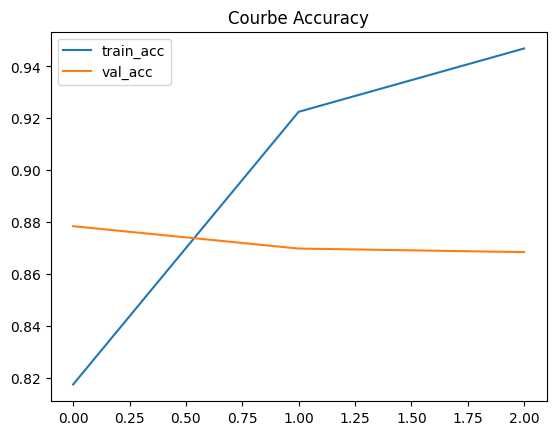

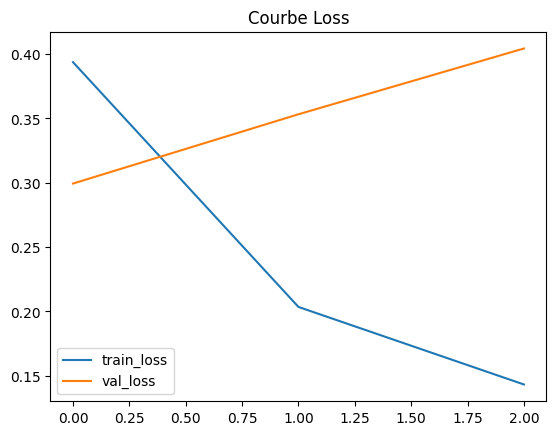

In [41]:
#Visualiser les courbes d’apprentissage
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history.history["accuracy"], label="train_acc")
plt.plot(history.history["val_accuracy"], label="val_acc")
plt.title("Courbe Accuracy")
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.title("Courbe Loss")
plt.legend()
plt.show()


In [42]:
#Évaluer sur le test set
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(BATCH)
y_proba = model_lstm.predict(test_ds).ravel()
y_pred  = (y_proba >= 0.5).astype(int)

print("Test Accuracy :", accuracy_score(y_test, y_pred))
print("Test AUC :", roc_auc_score(y_test, y_proba))
print(classification_report(y_test, y_pred, digits=4))


157/157 ━━━━━━━━━━━━━━━━━━━━ 23s 141ms/step
Test Accuracy : 0.8836
Test AUC : 0.9506260399999998
              precision    recall  f1-score   support

           0     0.8927    0.8720    0.8822      5000
           1     0.8749    0.8952    0.8849      5000

    accuracy                         0.8836     10000
   macro avg     0.8838    0.8836    0.8836     10000
weighted avg     0.8838    0.8836    0.8836     10000



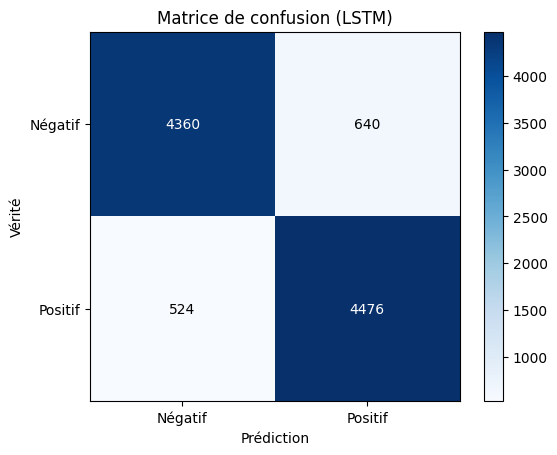

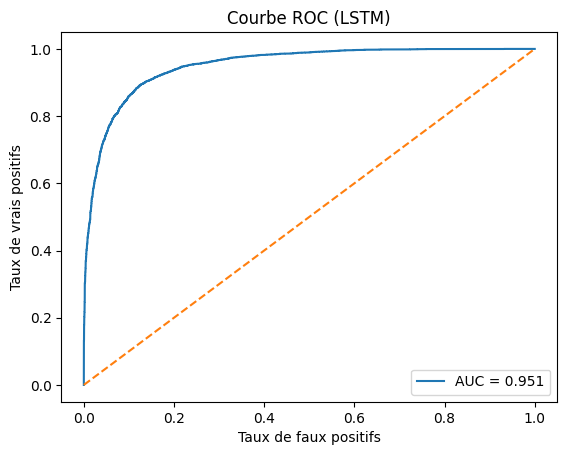

In [43]:
#Matrice de confusion + courbe ROC
# Matrice
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap="Blues")
plt.title("Matrice de confusion (LSTM)")
plt.colorbar()
plt.xticks([0,1], ["Négatif","Positif"])
plt.yticks([0,1], ["Négatif","Positif"])
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center",
                 color="white" if cm[i, j] > cm.max()/2 else "black")
plt.xlabel("Prédiction"); plt.ylabel("Vérité")
plt.show()

# ROC
fpr, tpr, thr = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0,1],[0,1],"--")
plt.xlabel("Taux de faux positifs")
plt.ylabel("Taux de vrais positifs")
plt.title("Courbe ROC (LSTM)")
plt.legend()
plt.show()


Projet 3 — Prédiction de prix de l'immobilier avec modèles classiques

Objectif : Prédire les prix des maisons selon caractéristiques + zone géographique

Techniques : Feature Engineering, Random Forest, Gradient Boosting

•	📦 Dataset :
House Prices - Advanced Regression
•	🔧 Tâches :

•	Encodage, imputation
•	Pipeline de transformation
•	Comparaison de modèles
•	Feature importance
•	Soumission Kaggle (bonus)


In [45]:
import pandas as pd

# Adapter les chemins selon ton Drive
train_path = '/content/drive/MyDrive/Formation IA/TestFinal/trainHouse.csv'
test_path  = '/content/drive/MyDrive/Formation IA/TestFinal/testHouse.csv'

df_train = pd.read_csv(train_path)
df_test  = pd.read_csv(test_path)

print("Train :", df_train.shape)
print("Test  :", df_test.shape)
df_train.head()



Train : (1460, 81)
Test  : (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [46]:
# La cible (prix de vente)
target = 'SalePrice'
y_train = df_train[target]

# Retirer l’ID et la cible du jeu d'entraînement
X_train = df_train.drop(columns=[target, 'Id'])
# Retirer seulement l’ID du jeu de test
X_test  = df_test.drop(columns=['Id'])

print("X_train :", X_train.shape)
print("X_test  :", X_test.shape)


X_train : (1460, 79)
X_test  : (1459, 79)


In [47]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [49]:
#imputation
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_train.select_dtypes(include=['object']).columns

print("Variables numériques :", len(num_cols))
print("Variables catégorielles :", len(cat_cols))

# Remplacer les valeurs manquantes
X_train[num_cols] = X_train[num_cols].fillna(X_train[num_cols].median())
X_train[cat_cols] = X_train[cat_cols].fillna(X_train[cat_cols].mode().iloc[0])

X_test[num_cols] = X_test[num_cols].fillna(X_train[num_cols].median())
X_test[cat_cols] = X_test[cat_cols].fillna(X_train[cat_cols].mode().iloc[0])


Variables numériques : 36
Variables catégorielles : 43


In [50]:
#encodage
X_train_encoded = pd.get_dummies(X_train, columns=cat_cols, drop_first=True)
X_test_encoded  = pd.get_dummies(X_test, columns=cat_cols, drop_first=True)

# Aligner les colonnes (important car le test peut avoir moins de catégories)
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join="left", axis=1, fill_value=0)


In [51]:
# Variable cible
target = "SalePrice"
y_train = df_train[target]

# Suppression de l’ID
X_train = df_train.drop(columns=[target, "Id"])
X_test  = df_test.drop(columns=["Id"])

print("Train :", X_train.shape, " Test :", X_test.shape)

Train : (1460, 79)  Test : (1459, 79)


Entraîner un modèle avec Random Forest

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score



In [54]:
#Definir les modèles randomforest, boosting
models = {
    "Random Forest": RandomForestRegressor(
        n_estimators=300,
        max_depth=None,
        random_state=42,
        n_jobs=-1
    ),
    "Gradient Boosting": GradientBoostingRegressor(
        n_estimators=300,
        learning_rate=0.1,
        max_depth=3,
        random_state=42
    )
}


In [55]:
#Validation croisée pour comparer les deux modèles
kf = KFold(n_splits=5, shuffle=True, random_state=42)

results = []
for name, model in models.items():
    neg_rmse = cross_val_score(
        model, X_train_encoded, y_train,
        scoring="neg_root_mean_squared_error",
        cv=kf, n_jobs=-1
    )
    r2 = cross_val_score(
        model, X_train_encoded, y_train,
        scoring="r2",
        cv=kf, n_jobs=-1
    )
    results.append({
        "Modèle": name,
        "RMSE moyen": -np.mean(neg_rmse),
        "R² moyen": np.mean(r2)
    })

df_results = pd.DataFrame(results).sort_values("RMSE moyen")
print(df_results)


              Modèle    RMSE moyen  R² moyen
1  Gradient Boosting  28939.043656  0.843449
0      Random Forest  30403.006126  0.838195


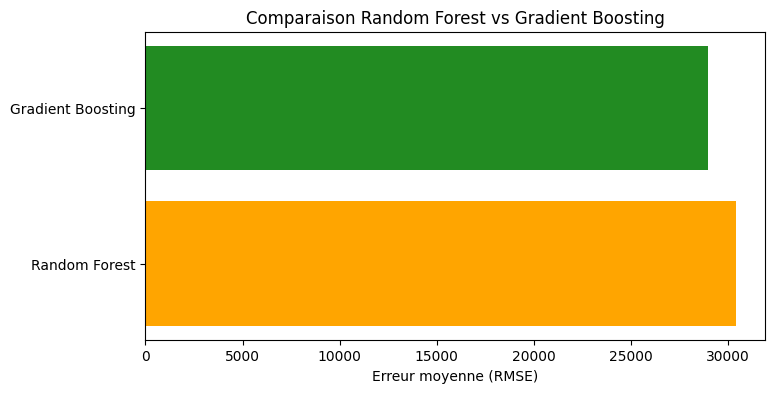

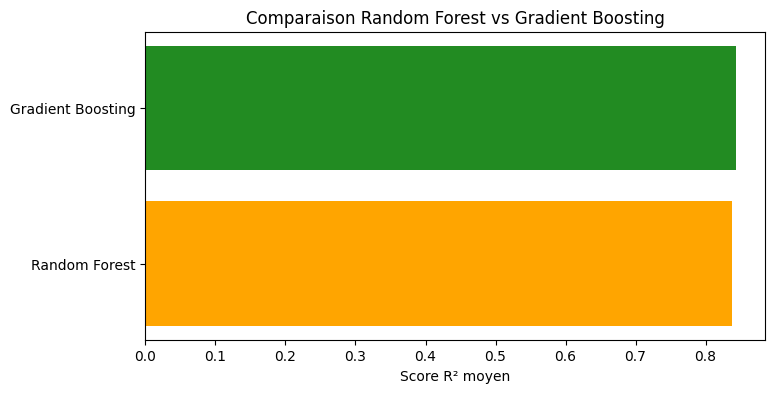

In [56]:
#Visualisation de la comparaison
plt.figure(figsize=(8,4))
plt.barh(df_results["Modèle"], df_results["RMSE moyen"], color=["forestgreen","orange"])
plt.xlabel("Erreur moyenne (RMSE)")
plt.title("Comparaison Random Forest vs Gradient Boosting")
plt.gca().invert_yaxis()
plt.show()

plt.figure(figsize=(8,4))
plt.barh(df_results["Modèle"], df_results["R² moyen"], color=["forestgreen","orange"])
plt.xlabel("Score R² moyen")
plt.title("Comparaison Random Forest vs Gradient Boosting")
plt.gca().invert_yaxis()
plt.show()


In [59]:
#Entraîner le meilleur modèle et prédire
best_name = df_results.iloc[0]["Modèle"]
print(f"Meilleur modèle : {best_name}")

best_model = models[best_name]
best_model.fit(X_train_encoded, y_train)

# Prédictions sur le test set
y_pred_test = best_model.predict(X_test_encoded)
print("Exemples de prédictions :", y_pred_test[:10])


Meilleur modèle : Gradient Boosting
Exemples de prédictions : [117755.65212952 164636.03383117 179584.14799177 188942.9690991
 189270.32546887 178898.26173982 166618.11896579 167689.57338166
 191334.00397037 125609.27203433]


In [60]:
#Évaluation sur le train
y_pred_train = best_model.predict(X_train_encoded)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)

print(f"RMSE (train): {rmse_train:.2f}")
print(f"R² (train)  : {r2_train:.3f}")


RMSE (train): 9668.44
R² (train)  : 0.985
